# My Data
Link: https://www.kaggle.com/johnsmith88/heart-disease-dataset

# Variables
1. age
    - age of patient
2. sex 
    - (1 = male, 0 = female)
3. cp
    - chest pain type (4 values) 
    - 0: asymptomatic
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: typical angina
4. trestbs: resting blood pressure 
5. chol: serum cholestoral in mg/dl 
6. fbs: fasting blood sugar > 120 mg/dl 
7. restecg: resting electrocardiographic results
    - (values 0,1,2) 
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina > 
10. oldpeak: oldpeak = ST depression induced by exercise relative to rest > 
11. slope: the slope of the peak exercise ST segment > 
12. ca: number of major vessels 
    - (0-3) colored by flourosopy 
13. thal: thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target (0 = no heart disease, 1 = heart disease)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
data = pd.read_csv('data/heart.csv')

In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Cleaning the Data for clear EDA
The data seems to be in good shape for modeling, however it could be a little confusing for EDA.  
We will rename column names and variables for clarity when performing EDA

In [14]:
data.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

### Renaming column names for clarity

In [16]:
data = data.rename(columns ={'age' : 'Age',
                             'sex' : 'Sex', 
                             'cp' : 'Chest Pain Type',
                             'trestbps' : 'Resting Blood Pressure',
                             'chol' : 'Cholesterol Level',
                             'fbs' : 'Fasting Blood Sugar',
                             'restecg' : 'Resting ECG Results',
                             'thalach' : 'Max Hear Rate Achieved',
                             'exang' : 'Exercise Induced Angina',
                             'oldpeak' : 'Old Peak',
                             'slope' : 'Slope',
                             'ca' : 'CA',
                             'thal' : 'Thalamia',
                             'target' : 'Heart Disease'
                            })

In [17]:
data.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Fasting Blood Sugar,Resting ECG Results,Max Hear Rate Achieved,Exercise Induced Angina,Old Peak,Slope,CA,Thalamia,Heart Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
data.dtypes

Age                          int64
Sex                          int64
Chest Pain Type              int64
Resting Blood Pressure       int64
Cholesterol Level            int64
Fasting Blood Sugar          int64
Resting ECG Results          int64
Max Hear Rate Achieved       int64
Exercise Induced Angina      int64
Old Peak                   float64
Slope                        int64
CA                           int64
Thalamia                     int64
Heart Disease                int64
dtype: object

In [19]:
data.shape

(1025, 14)

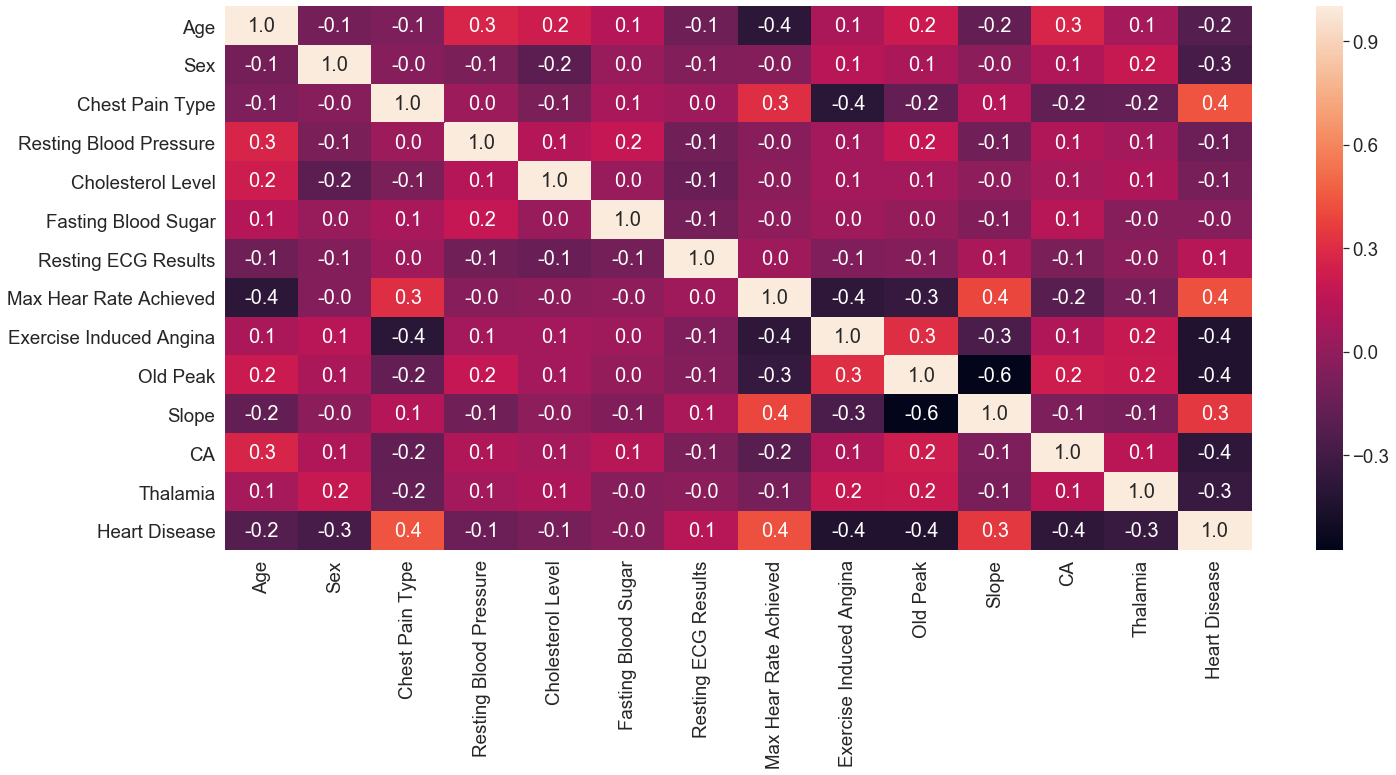

In [31]:
sns.set(font_scale=1.7)
plt.figure(figsize = (23, 10))
sns.heatmap(data.corr(), annot=True, fmt = '.1f', annot_kws={'size':20})
plt.show()

# EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

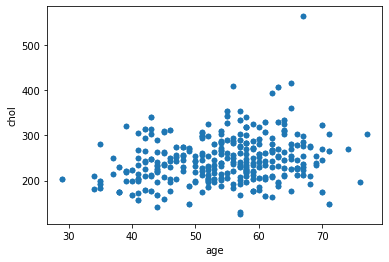

In [10]:
data.plot.scatter(x = 'age', y = 'chol')

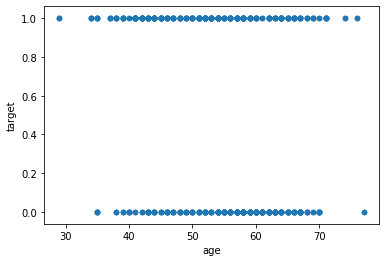

In [84]:
data.plot.scatter(x = 'age', y = 'target')

Text(0.5, 1.0, 'Males vs Females')

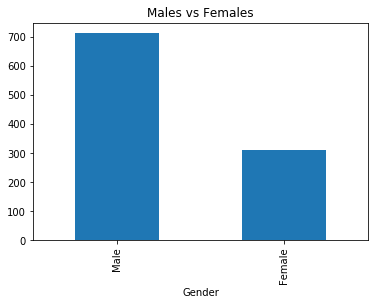

In [56]:
data.sex.value_counts().plot.bar();
plt.xlabel('Gender');
plt.ylabel('')
plt.title('Males vs Females')

**We have way more males than females**

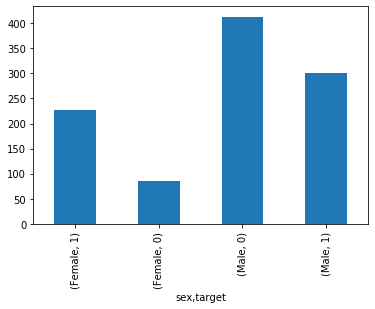

In [62]:
data.groupby('sex').target.value_counts().plot.bar()

Text(0.5, 1.0, 'Distribution of Age')

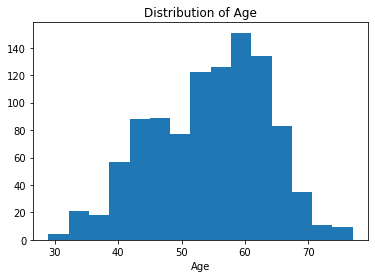

In [58]:
data.age.hist(bins = 15, grid = False);
plt.xlabel('Age')
plt.ylabel('')
plt.title('Distribution of Age')

**We have a unimodal, slightly skewed to the left dsitrubtion o age**  
**Most people in our data set are on the slightly older side**

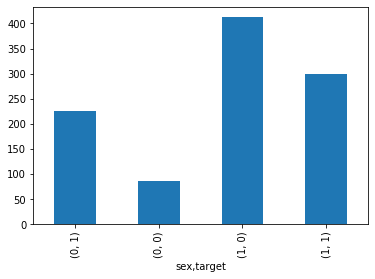

In [14]:
data.groupby('sex').target.value_counts().plot.bar()

In [15]:
import seaborn as sns

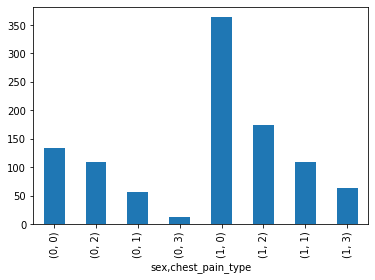

In [16]:
data.groupby('sex').chest_pain_type.value_counts().plot.bar()

In [17]:
bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':25,
            'figure.figsize':(10.0,5.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})  

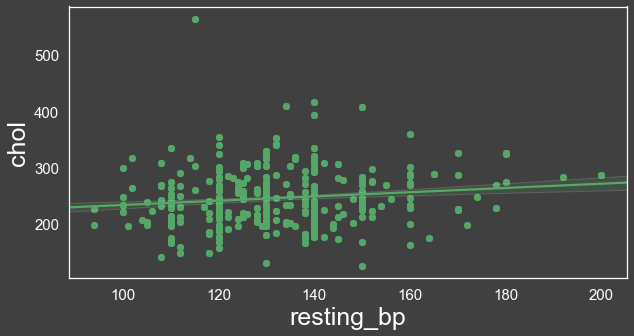

In [18]:
ax = sns.regplot(x='resting_bp', y='chol',data=data, color="g")

In [19]:
data.groupby('sex').target.value_counts()

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: target, dtype: int64